In [1]:
import csv
import pickle
import re
from datetime import datetime
import numpy as np
# randn = np.random.randn
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from urllib import urlopen
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from __future__ import division
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn import tree
from sklearn.externals.six import StringIO
import os
from sklearn.externals.six import StringIO  
import pydot
from sklearn.cross_validation import StratifiedKFold


## Variables Pre-processing

### Categorical:

01 - contact: cellular = 1

02 - job: student, retired = 1

03 - marital: single = 1

04 - poutcome (failure, nonexistent, success): success = 1

### Continuous:

05 - age: parabola centered around age 47

06 - campaign (contacts in present campaign): 1 / value

07 - emp.var.rate: 1 - normalized value

08 - euribor3m: 1- normalized value

09 - pdays (days from last campaign contact, or 999): !=999 = 1

10 - previous (number of contacts in previous campaign): !=0 = 1

In [2]:
bank_full = read_csv('bank-additional-full.csv', delimiter=';', header=0)
bank_full.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [3]:
bank = bank_full[['age','job','marital','contact','campaign','pdays','previous','poutcome','emp.var.rate','euribor3m','y']]
bank.head(3)

,age,job,marital,contact,campaign,pdays,previous,poutcome,emp.var.rate,euribor3m,y
0,56,housemaid,married,telephone,1,999,0,nonexistent,1.1,4.857,no
1,57,services,married,telephone,1,999,0,nonexistent,1.1,4.857,no
2,37,services,married,telephone,1,999,0,nonexistent,1.1,4.857,no


In [4]:
pd.options.mode.chained_assignment = None

In [5]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

In [6]:
bank['age'] =((bank['age']-47)/30) ** 2
bank['age'][bank['age'] > 1] = 1

In [7]:
bank['job'][bank['job'] == 'student'] = 1
bank['job'][bank['job'] == 'retired'] = 1
bank['job'][bank['job'] != 1] = 0

In [8]:
bank['marital'][bank['marital'] == 'single'] = 1
bank['marital'][bank['marital'] != 1] = 0

In [9]:
bank['contact'][bank['contact'] == 'cellular'] = 1
bank['contact'][bank['contact'] != 1] = 0

In [10]:
bank['campaign'] = 1 / bank['campaign']

In [11]:
bank['pdays'][bank['pdays'] != 999] = 1
bank['pdays'][bank['pdays'] == 999] = 0

In [12]:
bank['previous'][bank['previous'] != 0] = 1
bank['previous'][bank['previous'] != 1] = 0

In [13]:
bank['poutcome'][bank['poutcome'] == 'failure'] = 0
bank['poutcome'][bank['poutcome'] == 'nonexistent'] = 0
bank['poutcome'][bank['poutcome'] == 'success'] = 1

In [14]:
bank['emp.var.rate'] = abs((bank['emp.var.rate'] - 1.4) / 4.8)

In [15]:
bank['euribor3m'] = 1 - (bank['euribor3m'] / 5.5)

In [16]:
bank.head(5)

,age,job,marital,contact,campaign,pdays,previous,poutcome,emp.var.rate,euribor3m,y
0,0.090000,0,0,0,1,0,0,0,0.0625,0.116909,0
1,0.111111,0,0,0,1,0,0,0,0.0625,0.116909,0
2,0.111111,0,0,0,1,0,0,0,0.0625,0.116909,0
3,0.054444,0,0,0,1,0,0,0,0.0625,0.116909,0
4,0.090000,0,0,0,1,0,0,0,0.0625,0.116909,0


In [17]:
byes = bank[bank['y'] == 1]
bno = bank[bank['y'] == 0]

In [18]:
print len(byes), len(bno), (len(byes)/len(bank)), (len(bno)/len(bank))

4640 36548 0.112654171118 0.887345828882


In [19]:
X = bank.drop('y', 1)
y = bank['y']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.15, random_state=0)

In [20]:
print X.shape, X_train.shape, X_test.shape

(41188, 10) (35009, 10) (6179, 10)


In [21]:
acc_scores = {}
for n in range(20):
    clf = KNeighborsClassifier(n_neighbors=(n+1)).fit(X_train, y_train)
    y_pred_knn = clf.predict(X_test)
    acc_scores.setdefault((n+1), [])
    acc_scores[(n+1)].append(accuracy_score(y_test, y_pred_knn))

In [22]:
print acc_scores

{1: [0.84932837028645414], 2: [0.89399579219938496], 3: [0.88897879915843991], 4: [0.89626153099206995], 5: [0.89512866159572746], 6: [0.89755623887360414], 7: [0.89626153099206995], 8: [0.90046933160705611], 9: [0.89642336947726164], 10: [0.89804175432917943], 11: [0.89771807735879594], 12: [0.89787991584398774], 13: [0.89771807735879594], 14: [0.89771807735879594], 15: [0.89820359281437123], 16: [0.90030749312186442], 17: [0.89901278524033013], 18: [0.89982197766628902], 19: [0.89836543129956303], 20: [0.90063117009224791]}


In [23]:
nmax = max(acc_scores, key=acc_scores.get)
nmax

20

In [24]:
clf = KNeighborsClassifier(n_neighbors = (nmax))
knn_model = clf.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)

In [25]:
X_test = X_test.astype(float)
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)

In [26]:
clf = GaussianNB()
gnb_model = clf.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
y_proba_gnb = gnb_model.predict_proba(X_test)

In [27]:
clf = SVC(probability=True)
svc_model = clf.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
y_proba_svc = svc_model.predict_proba(X_test)

In [28]:
clf = DecisionTreeClassifier()
dtc_model = clf.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
y_proba_dtc = dtc_model.predict_proba(X_test)

In [29]:
clf = RandomForestClassifier()
rfc_model = clf.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)
y_proba_rfc = rfc_model.predict_proba(X_test)

In [30]:
#clf = tree.DecisionTreeClassifier()
#tdt_model = clf.fit(X_train, y_train)
#y_pred_tdt = tdt_model.predict(X_test)
#y_proba_tdt = tdt_model.predict_proba(X_test)
#accuracy_score(y_test, y_pred_tdt)

In [31]:
#with open("bank.dot", 'w') as f:
#    f = tree.export_graphviz(clf, out_file=f)
#os.unlink('bank.dot')
#dot_data = StringIO() 
#tree.export_graphviz(clf, out_file=dot_data) 
#graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("bank.pdf")

# GLM ?

In [32]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_knn[:,1])
roc_auc_knn = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_knn, pos_label = None, average = None)

(array([ 0.91246416,  0.62      ]),
 array([ 0.98274296,  0.22997033]),
 array([ 0.94630051,  0.33549784]),
 array([5505,  674]))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


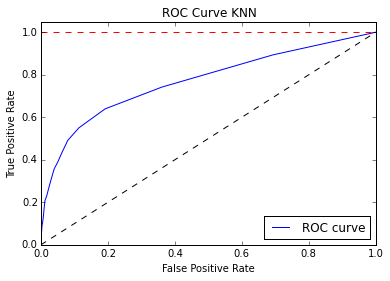

In [33]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.show()

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_log[:,1])
roc_auc_log = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_log, pos_label = None, average = None)

(array([ 0.91003518,  0.65238095]),
 array([ 0.98673933,  0.20326409]),
 array([ 0.94683633,  0.30995475]),
 array([5505,  674]))

Populating the interactive namespace from numpy and matplotlib


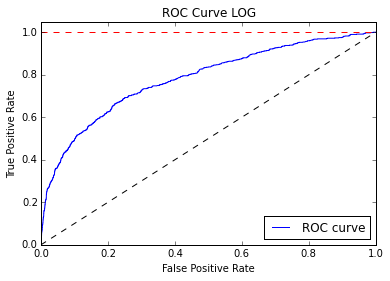

In [35]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_log)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LOG')
plt.legend(loc="lower right")
plt.show()

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_gnb[:,1])
roc_auc_gnb = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_gnb, pos_label = None, average = None)

(array([ 0.92212389,  0.44234405]),
 array([ 0.94641235,  0.34718101]),
 array([ 0.93411026,  0.38902743]),
 array([5505,  674]))

Populating the interactive namespace from numpy and matplotlib


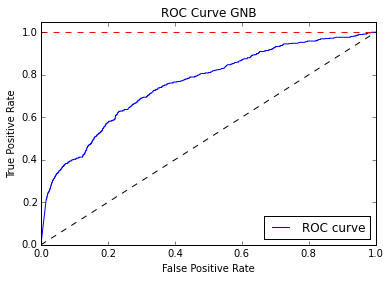

In [37]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve GNB')
plt.legend(loc="lower right")
plt.show()

In [38]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_svc[:,1])
roc_auc_svc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_svc, pos_label = None, average = None)

(array([ 0.9109094 ,  0.62608696]),
 array([ 0.98437784,  0.21364985]),
 array([ 0.94621966,  0.31858407]),
 array([5505,  674]))

Populating the interactive namespace from numpy and matplotlib


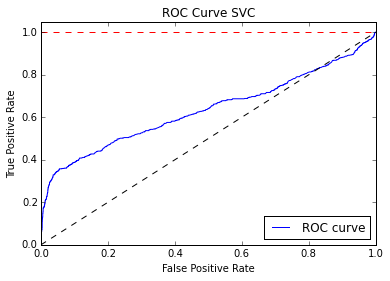

In [39]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC')
plt.legend(loc="lower right")
plt.show()

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_dtc[:,1])
roc_auc_dtc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_dtc, pos_label = None, average = None)

(array([ 0.92      ,  0.41965974]),
 array([ 0.94423252,  0.32937685]),
 array([ 0.93195876,  0.36907731]),
 array([5505,  674]))

Populating the interactive namespace from numpy and matplotlib


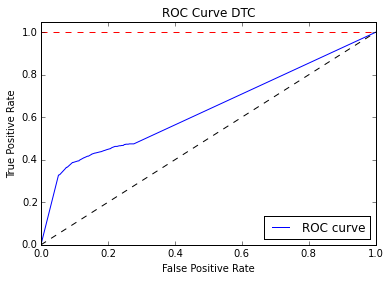

In [41]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_dtc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DTC')
plt.legend(loc="lower right")
plt.show()

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_rfc[:,1])
roc_auc_rfc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_rfc, pos_label = None, average = None)

(array([ 0.91598822,  0.46551724]),
 array([ 0.96058129,  0.28041543]),
 array([ 0.93775492,  0.35      ]),
 array([5505,  674]))

Populating the interactive namespace from numpy and matplotlib


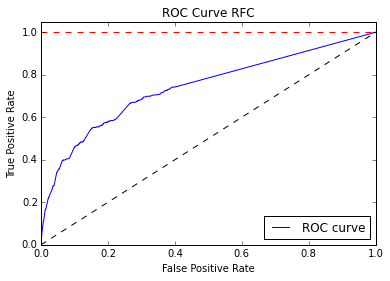

In [43]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RFC')
plt.legend(loc="lower right")
plt.show()

In [44]:
X = X.astype(float)
cv = StratifiedKFold(y, n_folds=4)

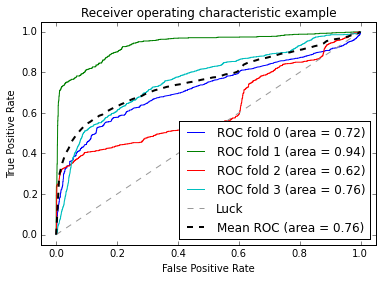

In [45]:
classifier = LogisticRegression()
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    # Compute ROC curve and area the curve
    probas_ = classifier.fit(X.iloc[train,:], y[train]).predict_proba(X.iloc[test,:])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [46]:
accuracy_score(y_test, y_pred_knn)

0.90063117009224791

In [47]:
accuracy_score(y_test, y_pred_log)

0.901278524033015

In [48]:
accuracy_score(y_test, y_pred_gnb)

0.88104871338404267

In [49]:
accuracy_score(y_test, y_pred_svc)

0.90030749312186442

In [50]:
accuracy_score(y_test, y_pred_dtc)

0.87716458973944

In [51]:
accuracy_score(y_test, y_pred_rfc)

0.88638938339537143

In [52]:
roc_auc_knn

0.76930872123265337

In [53]:
roc_auc_log

0.78126399793012558

In [54]:
roc_auc_gnb

0.75742715686036699

In [55]:
roc_auc_svc

0.63346404805989698

In [56]:
roc_auc_dtc

0.63683365809878789

In [57]:
roc_auc_rfc

0.74083191164223494

In [58]:
px2 = X_test.reshape((-1,10))
X_err = pd.DataFrame({'age':px2[:,0],'job':px2[:,1],'marital':px2[:,2],'contact':px2[:,3],'campaign':px2[:,4],'pdays':px2[:,5],'previous':px2[:,6],'poutcome':px2[:,7],'emp.var.rate':px2[:,8],'euribor3m':px2[:,9]})

In [59]:
y_err = y_pred_log - y_test

In [60]:
indneg = []
indpos = []
for r in range(len(y_err)):
    if y_err[r] == 1:
        indpos.append(r)
    if y_err[r] == -1:
        indneg.append(r)

print len(indneg), len(indpos)

537 73


In [61]:
X_ones_missed = X_err.iloc[indneg,:]

In [62]:
X_zeroes_missed = X_err.iloc[indpos,:]

In [63]:
mean(byes)

age             0.244659
job             0.152802
marital         0.349138
contact         0.830388
campaign        0.691456
pdays           0.208405
previous        0.323060
poutcome        0.192672
emp.var.rate    0.548635
euribor3m       0.613975
y               1.000000
dtype: float64

In [64]:
mean(bno)

age             0.163570
job             0.051603
marital         0.272190
contact         0.609910
campaign        0.626513
pdays           0.014994
previous        0.112893
poutcome        0.013106
emp.var.rate    0.239818
euribor3m       0.307002
y               0.000000
dtype: float64

In [65]:
sum(mean(byes))

5.1551919387929868

In [66]:
sum(mean(bno))

2.4115983427854122

In [67]:
mean(X_ones_missed)

age             0.229369
campaign        0.691406
contact         0.815642
emp.var.rate    0.506712
euribor3m       0.558903
job             0.132216
marital         0.342644
pdays           0.013035
poutcome        0.001862
previous        0.148976
dtype: float64

In [68]:
mean(X_zeroes_missed)

age             0.277412
campaign        0.683121
contact         0.931507
emp.var.rate    0.746861
euribor3m       0.826279
job             0.246575
marital         0.479452
pdays           1.000000
poutcome        0.931507
previous        1.000000
dtype: float64

In [69]:
sum(mean(X_ones_missed))

3.4407656511706786

In [70]:
sum(mean(X_zeroes_missed))

7.1227145921050026